In [1]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/

In [2]:
!java -version

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [3]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 198 kB 63.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=4263f6bee917cb0aa3633b2efa76715fc7308ac891a2d056061e1478c81f3eb1
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [4]:
import pyspark
pyspark.__version__

'3.2.0'

### Sparkcontext
- 스파크의 모든 기능에 접근하게 하는 특수 객체
- 스파크 프로그램 당 한번만 실행 가능
- 스파크의 entry point 라고도 함
- SparkContext 생성하는 것을 스파크를 초기화한다고 함

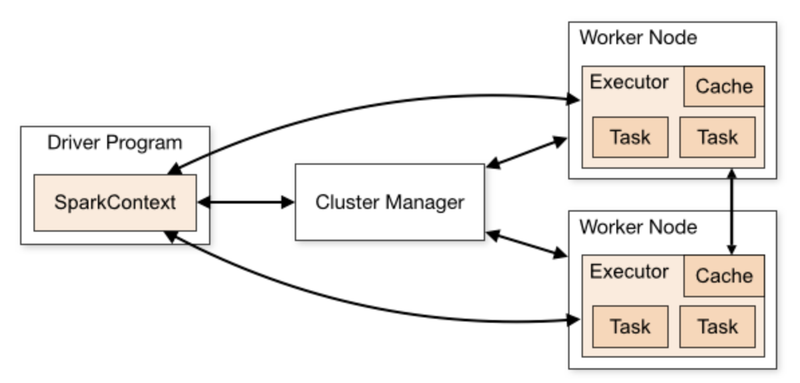

## PySpark

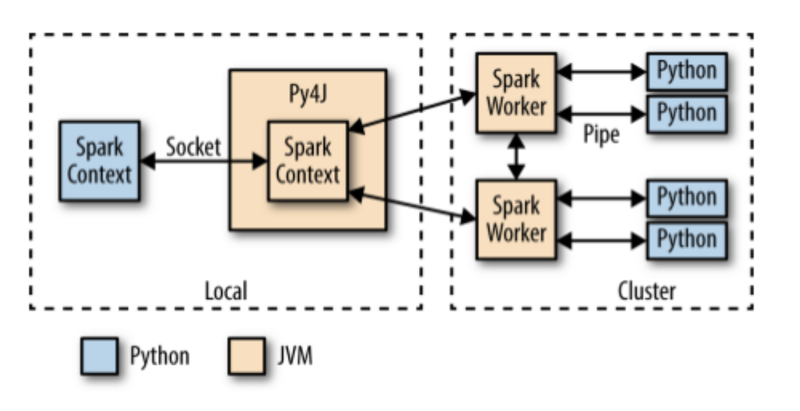

- PySpark에서 선언하는 SparkContext 객체는 내부의 JVM(Java Virtual Machine) 위에 동작하는 Py4J의 SparkContext와 연결
- Py4J의 SparkContext는 Worker 노드들과도 연결되어 있고 이 Worker 노드들 역시 실제 동작은 JVM 위에서 동작

1) 객체 생성

In [5]:
from pyspark import SparkConf, SparkContext
# 객체 생성
sc = SparkContext()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
type(sc)

pyspark.context.SparkContext

In [7]:
# 한개 더 만들면 에러가 남
new_sc = SparkContext()

ValueError: ignored

In [8]:
# 종료
sc.stop()

2) 환경설정 확인

In [10]:
#Configuration 세팅
sc = SparkContext(master='local', appName='PySpark Basic')
sc

# https://spark.apache.org/docs/latest/spark-standalone.html

<SparkContext master=local appName=PySpark Basic>

In [11]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.startTime', '1636095601814'),
 ('spark.app.name', 'PySpark Basic'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', 'b4633a67adeb'),
 ('spark.app.id', 'local-1636095601933'),
 ('spark.driver.port', '40653'),
 ('spark.ui.showConsoleProgress', 'true')]

In [12]:
sc.master

'local'

In [13]:
sc.appName

'PySpark Basic'

In [15]:
sc.stop()

3) `SparkConf()` SparkContext의 Configuration 설정을 통해 객체 생성

In [16]:
conf = SparkConf().setAppName('PySpark Basic').setMaster('local')
sc = SparkContext(conf=conf)
sc

<SparkContext master=local appName=PySpark Basic>

In [18]:
sc.stop()

## RDD Creation

- 내부 데이터 집합 병렬화 : `parallelize()`


In [19]:
sc = SparkContext()
# 함수 내부의 데이터 집합을 RDD로 만들 수 있음
rdd = sc.parallelize([1,2,3])

rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

In [20]:
type(rdd)

pyspark.rdd.RDD

아직 RDD가 만들어지지는 않았음. 
-> Action을 수행해 보자.

In [21]:
rdd.take(3)

[1, 2, 3]

In [24]:
file_path = '/content/sample_data/text.txt'
with open(file_path, 'w') as f:
    for i in range(10):
        f.write(str(i)+'\n')
        
print('OK')

OK


In [25]:
# 파일 불러와서 RDD를 생성하기

rdd2 = sc.textFile(file_path)
print(rdd2)
print(type(rdd2))

/content/sample_data/text.txt MapPartitionsRDD[4] at textFile at NativeMethodAccessorImpl.java:0
<class 'pyspark.rdd.RDD'>


In [26]:
# action
rdd2.take(5)

['0', '1', '2', '3', '4']

보통 `string type` 으로 결과가 나오기 때문에, `transformation`이 필요함. 

## Transformations
 말 그대로, 원하는 상태로 변형하는 것을 의미함.
  - map()
  - filter()
  - flatmap()

1) map

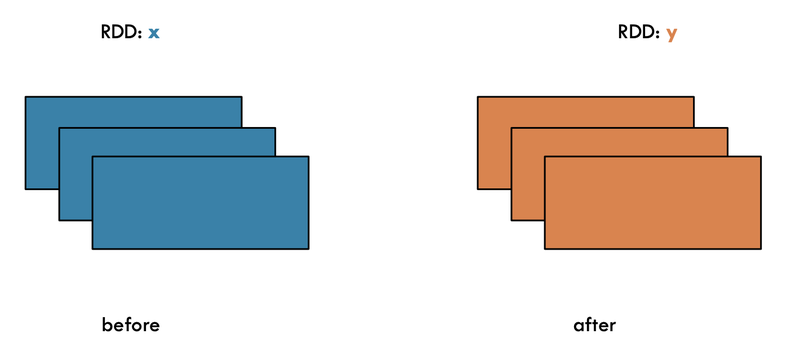

In [27]:
x = sc.parallelize(["b","a", "c", "d"]) # 생성
y = x.map(lambda z: (z,1)) #transformation

print(x.collect()) # collect()는 actions 입니다
print(y.collect()) 



['b', 'a', 'c', 'd']
[('b', 1), ('a', 1), ('c', 1), ('d', 1)]


In [28]:
nums = sc.parallelize([1, 2, 3]) # 생성
squares = nums.map(lambda x: x*x)
print(squares.collect())

[1, 4, 9]


2) filter

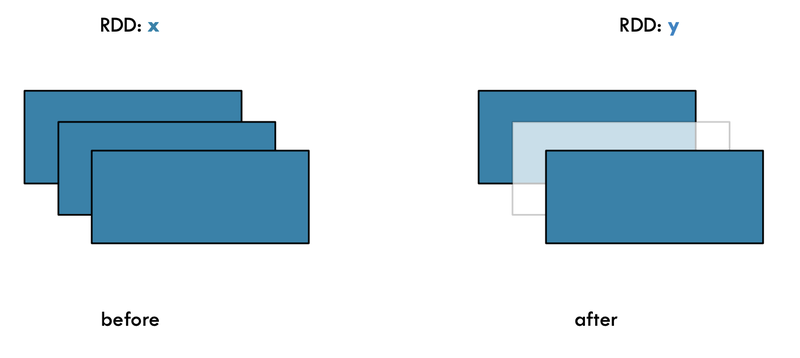

In [29]:
x= sc.parallelize([1,2,3,4,5]) #생성
y = x.filter(lambda x : x<4) #transformation
print(y.collect())

[1, 2, 3]


In [30]:
text = sc.parallelize(['a', 'b', 'c', 'd'])
capital = text.map(lambda x: x.upper())
A = capital.filter(lambda x: 'A' in x)
print(text.collect())
print(A.collect())

['a', 'b', 'c', 'd']
['A']


3) Flatmap : mapping에서 쪼개어 더 수를 늘리는 방향이 추가됨.

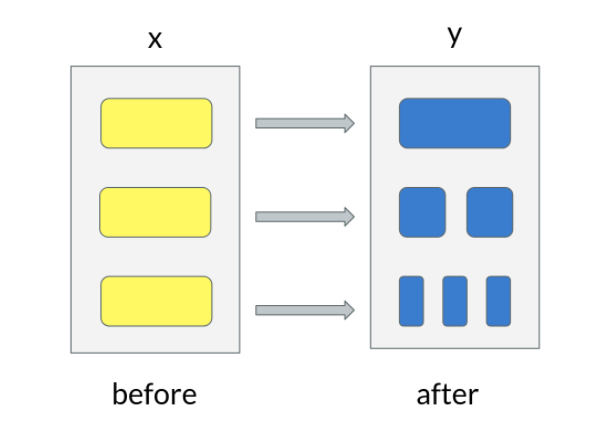

In [31]:
x = sc.parallelize([1,2,3])
y = x.flatMap(lambda x: (x, x*10, 30))
print(x.collect())
print(y.collect())

[1, 2, 3]
[1, 10, 30, 2, 20, 30, 3, 30, 30]


x, x*10, 30이 병렬적으로 매핑 및 생성됨을 확인.

In [34]:
wordsDataset = sc.parallelize(["Spark is funny", "It is beautiful", "I love you"])
# 단어 단위로 쪼개고, 공백으로 된 것들은 제거하고, 소문자화 시키는 코드
result = wordsDataset.flatMap(lambda x: x.split()).filter(lambda x : x!= " ").map(lambda x : x.lower())
result.collect()

['spark', 'is', 'funny', 'it', 'is', 'beautiful', 'i', 'love', 'you']